In [1]:
# import the necessary packages
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2

prototxt_path = '/Users/161459/Development/Personal/PuddingsCam/object-detection-deep-learning/MobileNetSSD_deploy.prototxt.txt'
model_path = '/Users/161459/Development/Personal/PuddingsCam/object-detection-deep-learning/MobileNetSSD_deploy.caffemodel'
min_confidence = 0.3

# initialize the list of class labels MobileNet SSD was trained to
# detect, then generate a set of bounding box colors for each class
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
    "bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
    "dog", "horse", "motorbike", "person", "pottedplant", "sheep",
    "sofa", "train", "tvmonitor"]
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

# load our serialized model from disk
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)

def detect_objects_and_display(img_path):
    # load the input image and construct an input blob for the image
    # by resizing to a fixed 300x300 pixels and then normalizing it
    # (note: normalization is done via the authors of the MobileNet SSD
    # implementation)
    image = cv2.imread(img_path)
    (h, w) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)

    # pass the blob through the network and obtain the detections and
    # predictions
    print("[INFO] computing object detections...")
    net.setInput(blob)
    detections = net.forward()

    # loop over the detections
    for i in np.arange(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with the
        # prediction
        confidence = detections[0, 0, i, 2]

        # filter out weak detections by ensuring the `confidence` is
        # greater than the minimum confidence
        if confidence > min_confidence:
            # extract the index of the class label from the `detections`,
            # then compute the (x, y)-coordinates of the bounding box for
            # the object
            idx = int(detections[0, 0, i, 1])
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            # display the prediction
            label = "{}: {:.2f}%".format(CLASSES[idx], confidence * 100)
            print("[INFO] {}".format(label))
            cv2.rectangle(image, (startX, startY), (endX, endY),
                COLORS[idx], 6)
            y = startY - 15 if startY - 15 > 15 else startY + 15
            cv2.putText(image, label, (startX, y),
                cv2.FONT_HERSHEY_SIMPLEX, 1.5, COLORS[idx], 4)

    # show the output image
    matplotlib.rcParams['figure.figsize'] = [12, 12]
    plt.axis("off")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()


[INFO] loading model...


Processing /Users/161459/Pictures/Personal/Puddings/puddings-quirky.jpg...
[INFO] computing object detections...
[INFO] dog: 99.84%


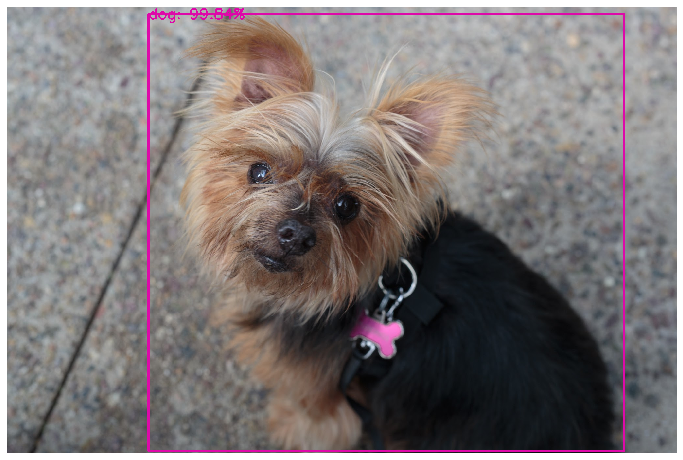

Processing /Users/161459/Pictures/Personal/Puddings/puddings-french-fries.jpg...
[INFO] computing object detections...
[INFO] dog: 99.92%


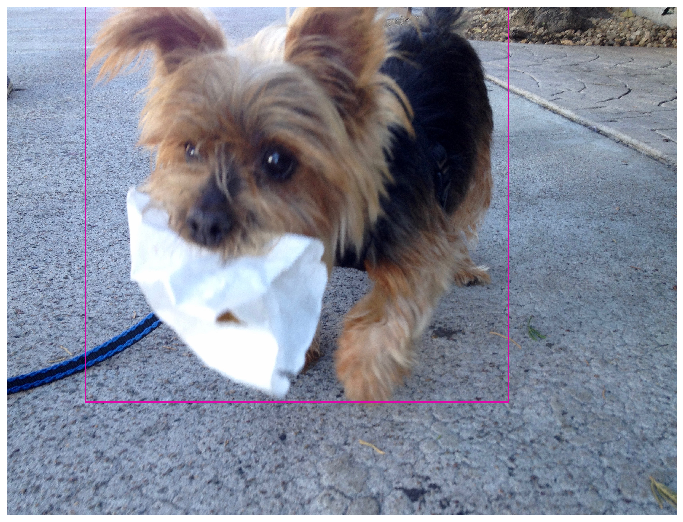

Processing /Users/161459/Pictures/Personal/Puddings/puddings-trash.jpg...
[INFO] computing object detections...
[INFO] dog: 98.25%


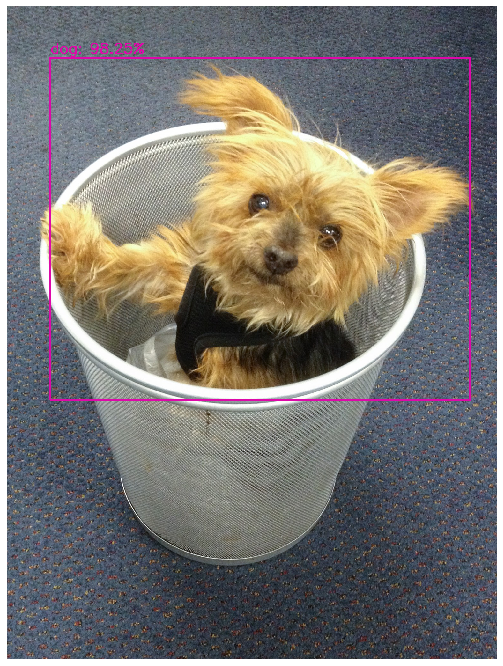

Processing /Users/161459/Pictures/Personal/Puddings/puddings-being-defiant.jpg...
[INFO] computing object detections...
[INFO] dog: 99.80%


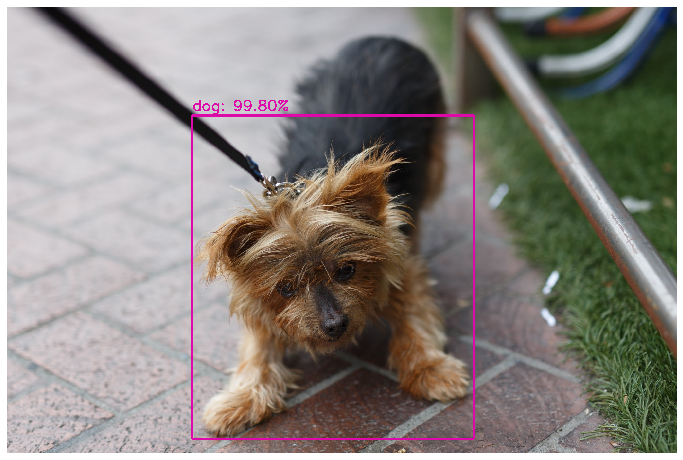

Processing /Users/161459/Pictures/Personal/Puddings/puddings-sees-ghosts.jpg...
[INFO] computing object detections...
[INFO] dog: 92.60%


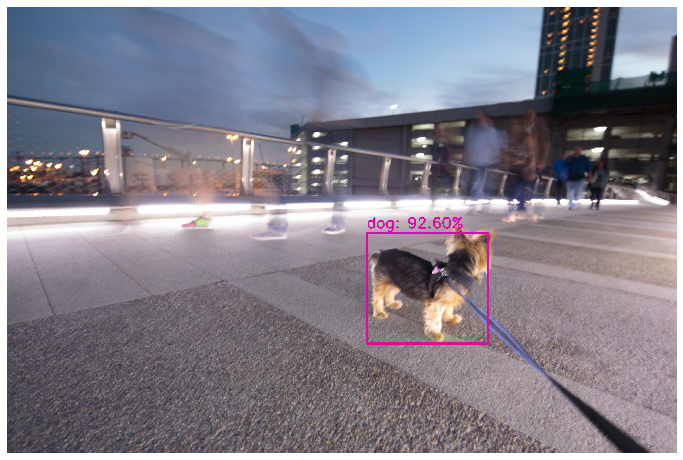

Processing /Users/161459/Pictures/Personal/Puddings/puddings-bone-marrow-please.jpg...
[INFO] computing object detections...
[INFO] dog: 41.56%
[INFO] person: 96.14%


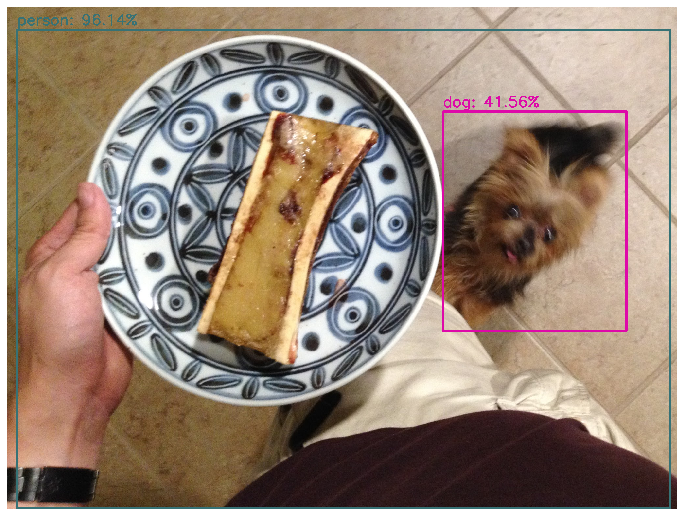

Processing /Users/161459/Pictures/Personal/Puddings/puddings-poor-sick-girl.jpg...
[INFO] computing object detections...
[INFO] dog: 99.83%


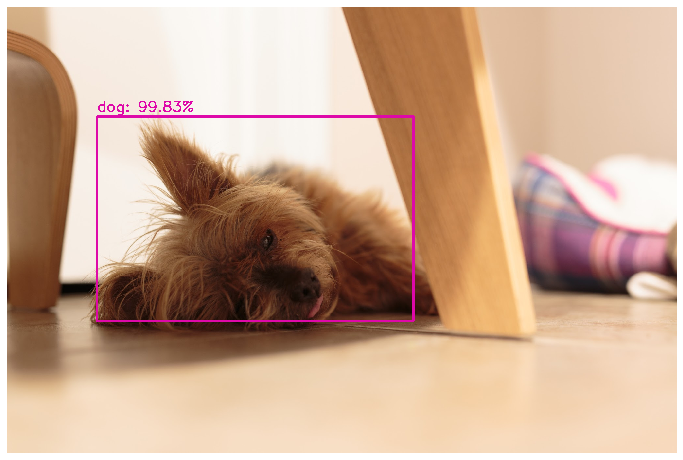

Processing /Users/161459/Pictures/Personal/Puddings/puddings-twin.jpg...
[INFO] computing object detections...
[INFO] bird: 31.15%
[INFO] dog: 99.54%
[INFO] dog: 93.48%


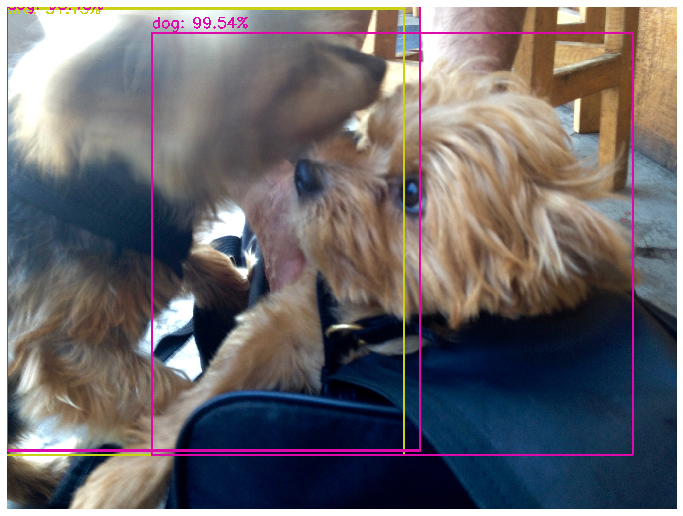

In [2]:
import glob
import random

img_paths = glob.glob('/Users/161459/Pictures/Personal/Puddings/puddings-*.jpg')
random.shuffle(img_paths)

for img_path in img_paths[0:8]:
    print('Processing ' + img_path + '...')
    detect_objects_and_display(img_path)